In [2]:
!pip all -v scikit_learn
!pip install graphviz
! apt_get install graphvizinst

ERROR: unknown command "all" - maybe you meant "install"
/bin/bash: line 1: apt_get: command not found


In [3]:
# import  libraries

import numpy as np
import pandas as pd
import scipy.stats as skew
import warnings
warnings.filterwarnings('ignore')
# Load the Excel file
excel_file = 'heart_disease.xlsx'

# Display all sheet names
sheet_names = pd.ExcelFile(excel_file).sheet_names
print("Sheets in the file:", sheet_names)


Sheets in the file: ['Description', 'Heart_disease']


In [4]:
df = pd.read_excel('heart_disease.xlsx',sheet_name = 'Heart_disease')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [5]:
# shape of the data set
df.shape

(908, 13)

# **Exploratory Data Analysis (EDA)**

In [6]:
# full information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [7]:
# all columns names
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [8]:
# checking the duplicates
df.duplicated().sum()

np.int64(1)

In [9]:
# Remove the duplicates
data = df.drop_duplicates()
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [10]:
# checking th missing values
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [11]:
# median of the missing value
data['oldpeak'].median()

0.5

In [12]:
# fill the missing values with median
data['oldpeak'] = data['oldpeak'].fillna(value = data['oldpeak'].median())

In [13]:
# describe the data set
data.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,53.787211,133.412348,201.465270,135.976847,0.865491,1.007718
std,9.162016,20.405432,112.158285,26.813075,1.060629,1.144594
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.500000,120.000000,176.500000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


## **Visualization**

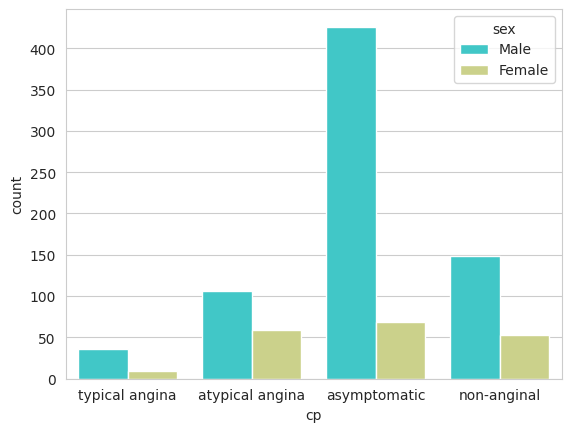

In [14]:
# visualize the sex and cp varables
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
sns.countplot(x = 'cp',hue = 'sex', data = data, palette = 'rainbow')
plt.show()

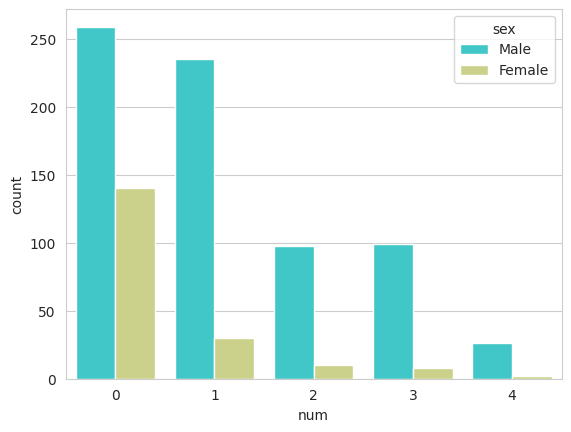

In [15]:
# visualize the gender num variables

sns.set_style('whitegrid')
sns.countplot(x = 'num',hue = 'sex', data = data, palette = 'rainbow')
plt.show()

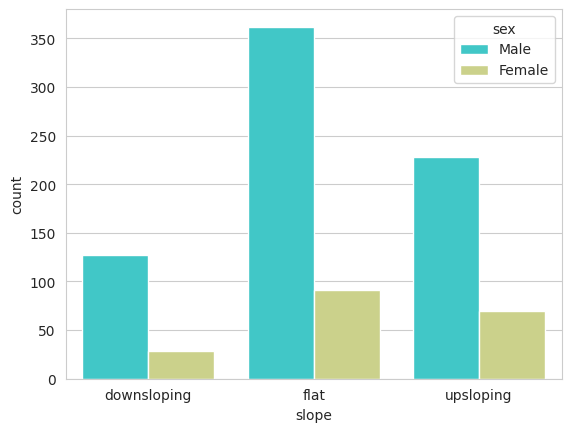

In [16]:
# visualize the slope and sex variables
sns.set_style('whitegrid')
sns.countplot(x='slope',hue='sex',data =data,palette = "rainbow")
plt.show()

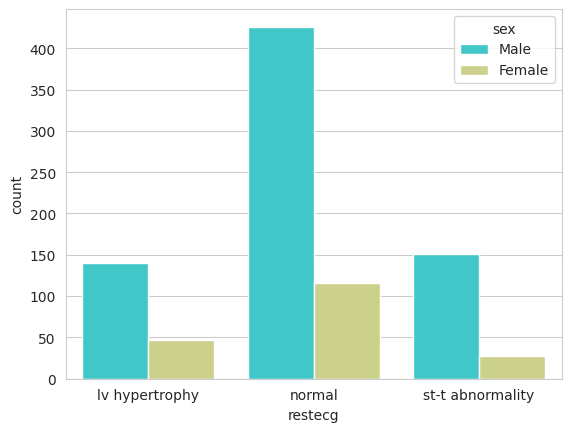

In [17]:
# visualize the sex and restecg

sns.set_style('whitegrid')
sns.countplot(x='restecg',hue='sex',data =data,palette = "rainbow")
plt.show()

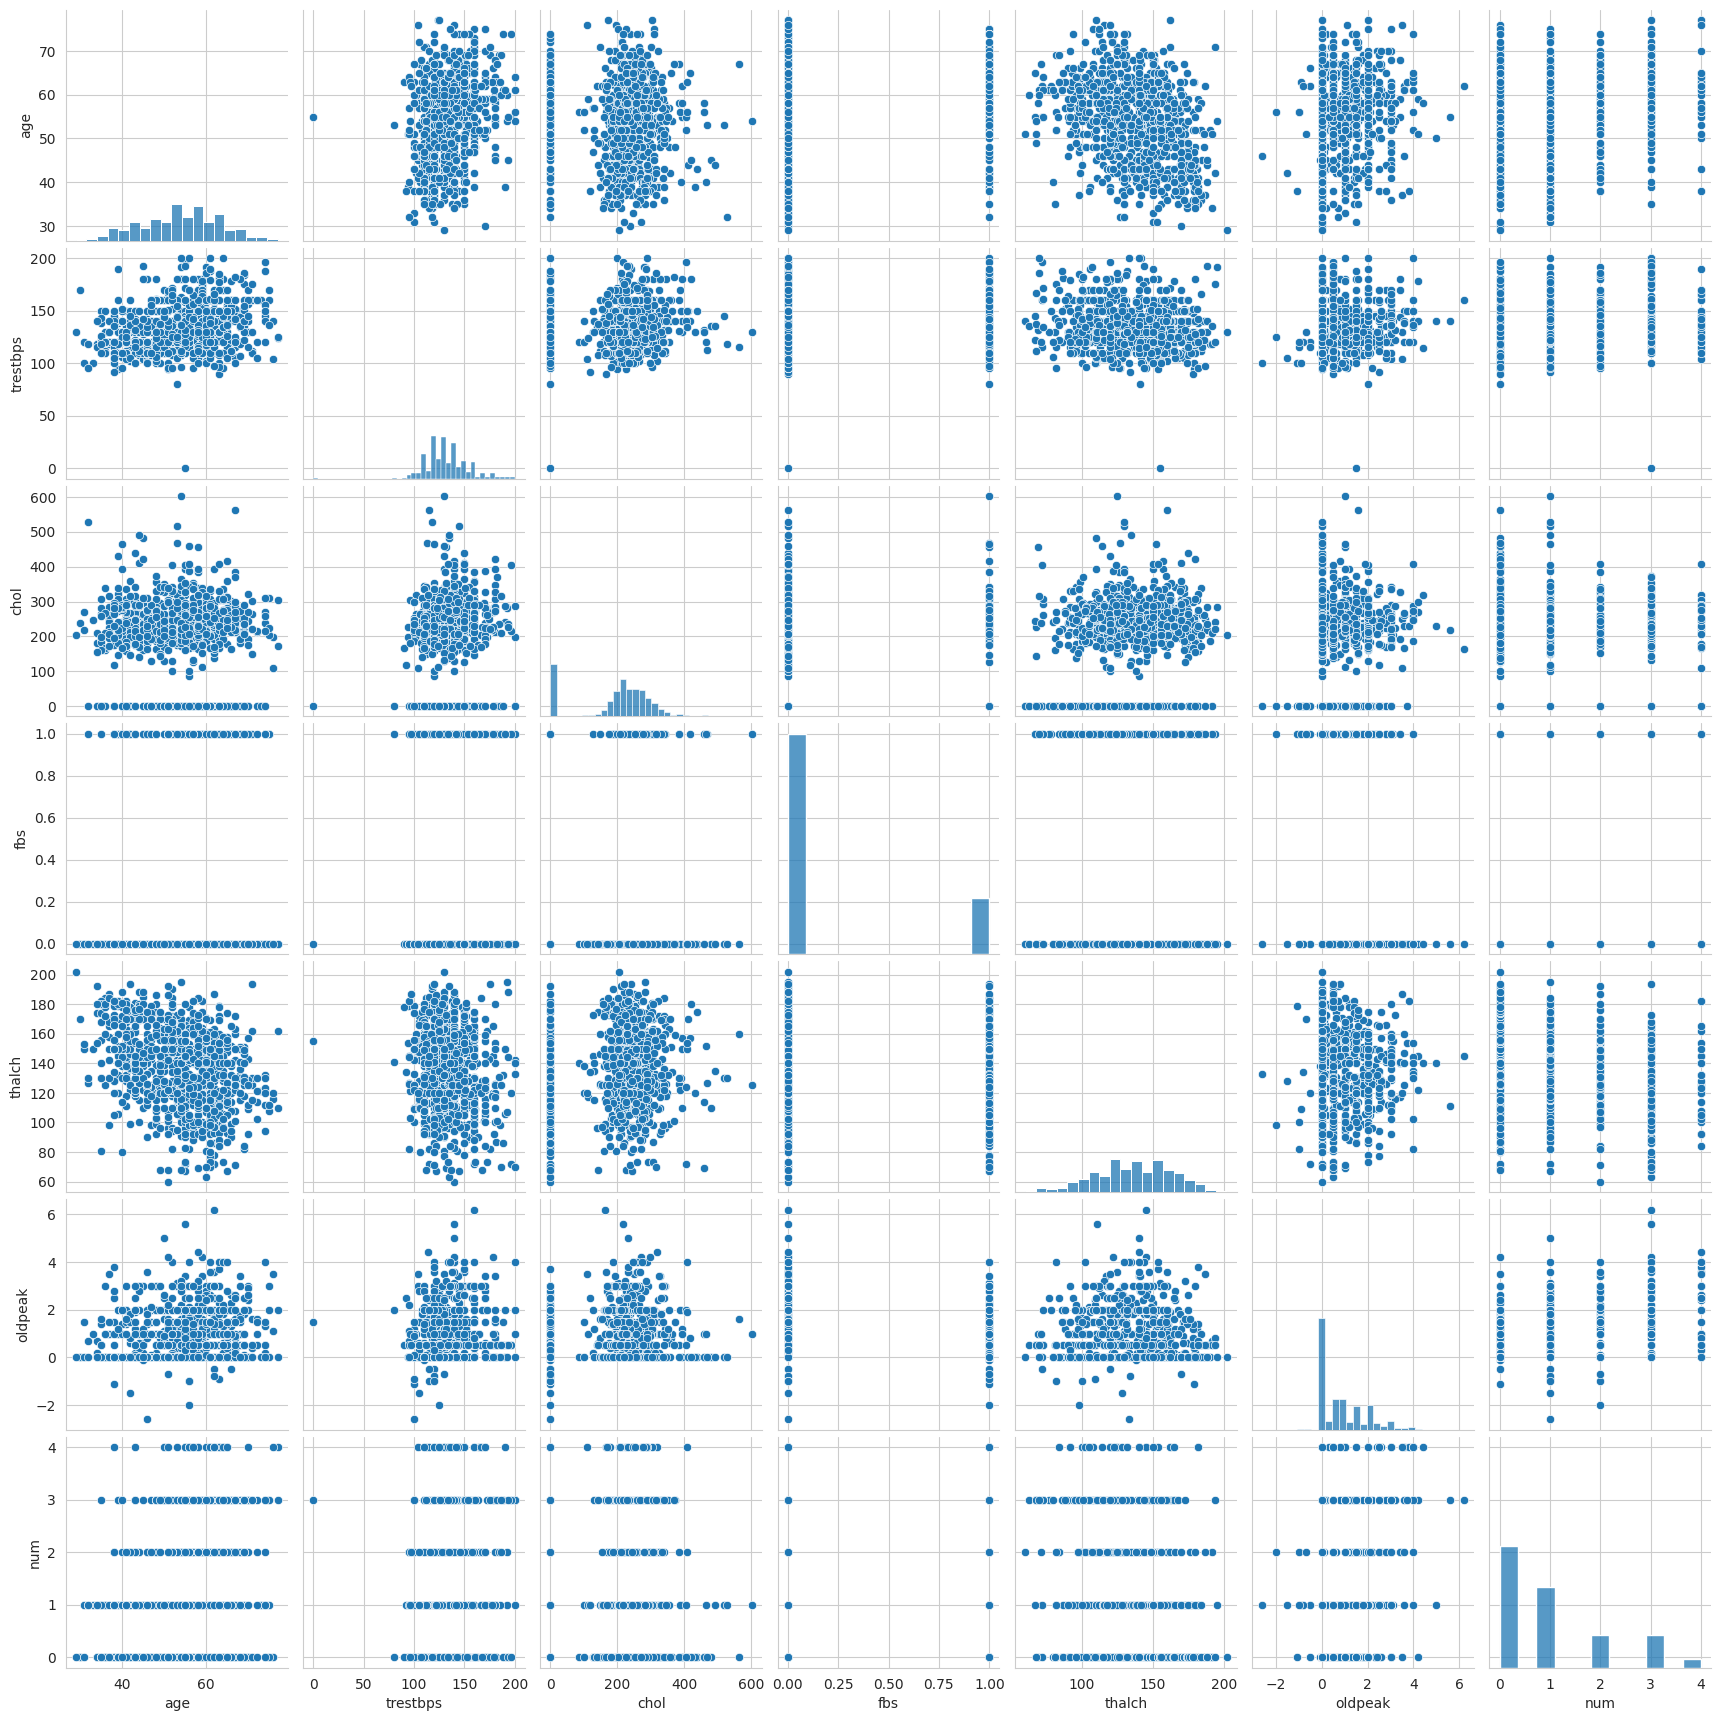

In [18]:
# import visualization liraries and constract the pairplot

import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(data)
plt.show()

In [19]:
# checking only numeric values
numeric_value = data.select_dtypes(include = np.number).columns
numeric_value

Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num'], dtype='object')

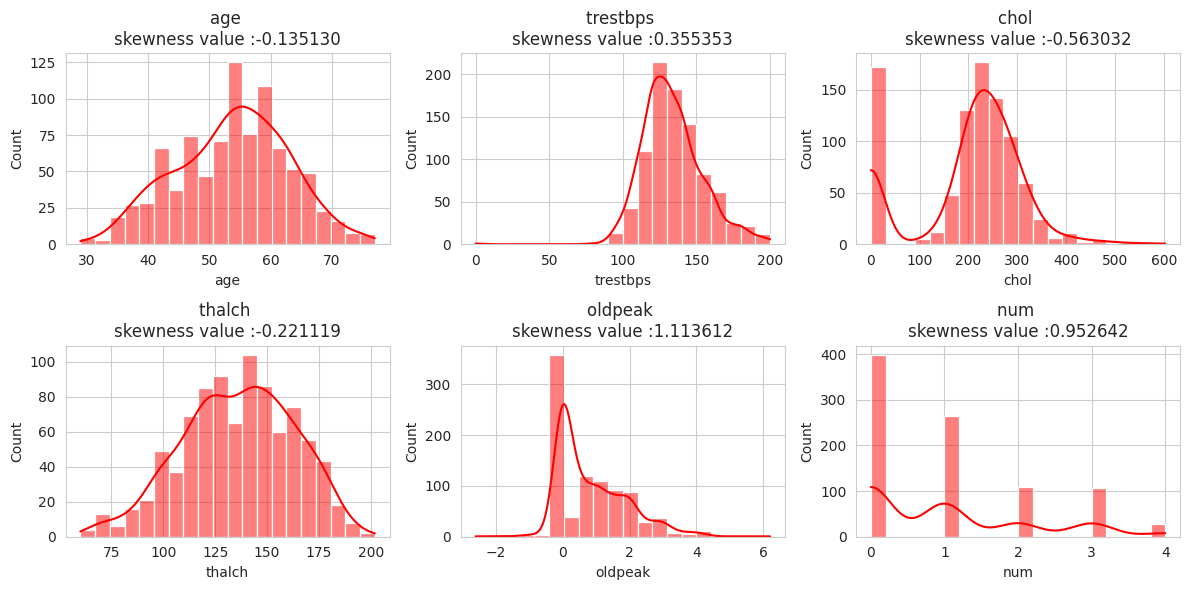

In [20]:
#  histogram of the coumns
numeric_columns = data.select_dtypes(include=np.number).columns
from scipy.stats import skew

# Set the figure size
plt.figure(figsize=(12, 6))

# Loop through each numeric column and plot a histogram
for i, column in enumerate(numeric_columns, 1):  # Start index from 1
    plt.subplot(2, 3, i)                         # Adjust rows and columns based on the number of numeric columns
    skew_value = skew(data[column].dropna())       # Corrected this line
    sns.histplot(data[column],kde = True,bins = 20,color = 'r')         # Use data[column] instead of numeric_columns[column]
    plt.title(f'{column} \nskewness value :{skew_value:2f}')                            # Add title for clarity

plt.tight_layout()                               # Adjust layout to prevent overlap
plt.show()

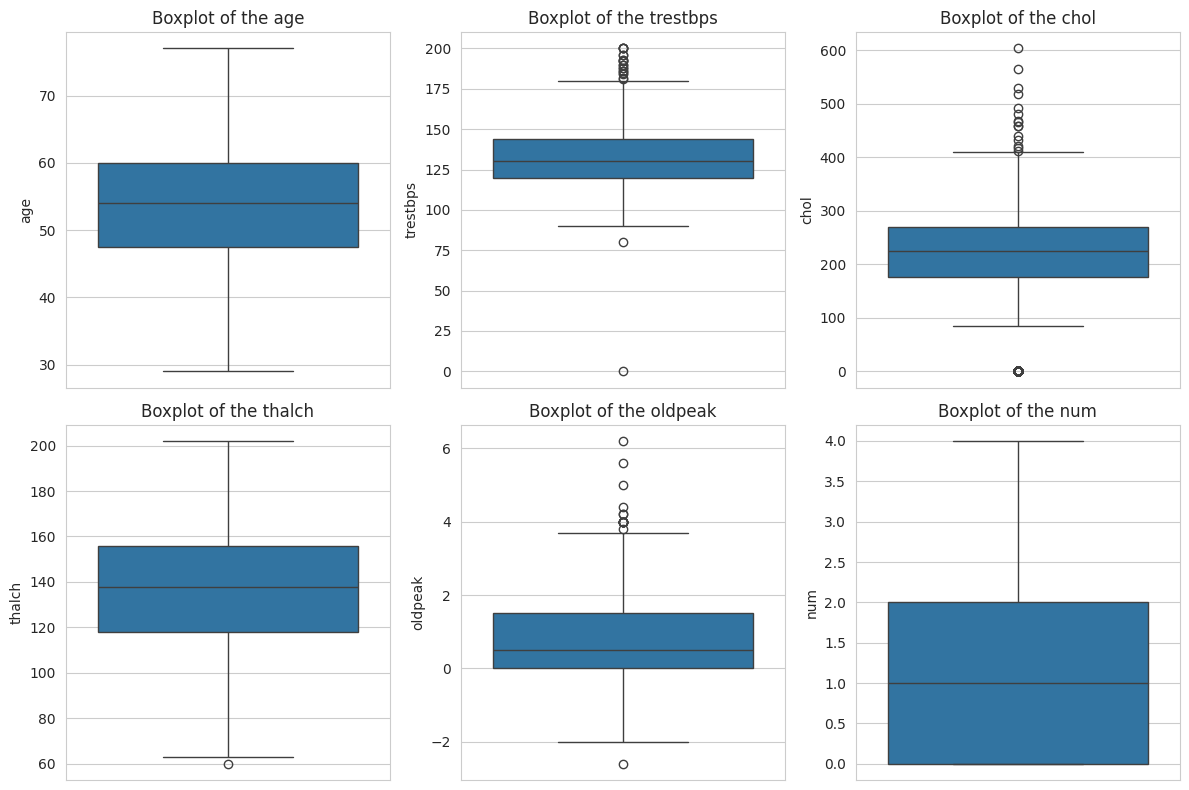

In [21]:
# creat a boxplot to identify the outliers

numeric_column = data.select_dtypes(include = ['number']).columns   # select the only numerical numbers
plt.figure(figsize = (12,8))                      # size of the boxplot
for i,column in enumerate(numeric_column,1):
    plt.subplot(2,3,i)                          # arrange the rows and columns based on the numeric_column
    sns.boxplot(data[column],vert = True)       # form a boxplot
    plt.title(f'Boxplot of the {column}')         # creat a column title
    plt.xticks(rotation=90)

plt.tight_layout()                          # differnce of the one box to another box
plt.show()


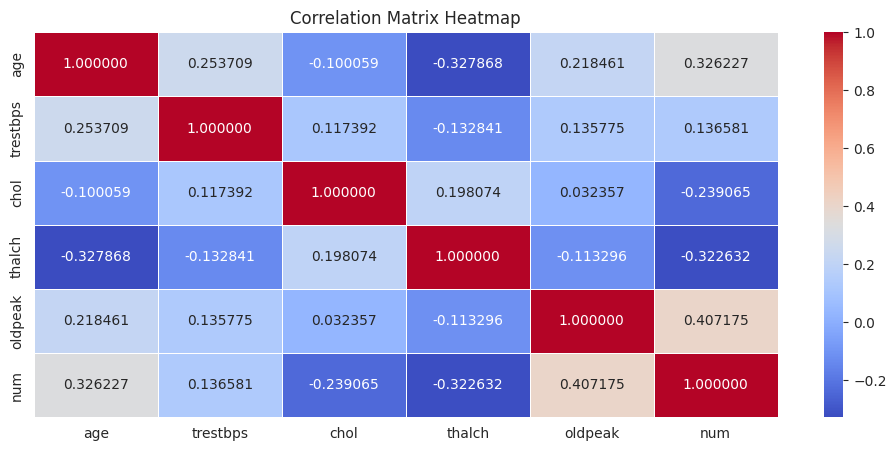

In [22]:
# correalation matrix

plt.figure(figsize = (12,5))
number = data.iloc[:, [0, 3, 4, 7, 9, 12]]
sns.heatmap(number.corr(),annot = True, cmap = 'coolwarm',fmt = '2f',linewidths = 0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [23]:
data_set = data.copy()
data_set

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,0.5,downsloping,fixed defect,4


In [24]:
# Remove the outliers and replace with meadian

def remove_outliers_replace_with_median(data_set):
    for column in data_set.select_dtypes(include=[np.number]).columns:
        Q1 = data_set[column].quantile(0.25)
        Q3 = data_set[column].quantile(0.75)
        IQR = Q3-Q1
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)

        median = data_set[column].median()
        data_set[column] = data_set[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)
    return data_set
clean_data = remove_outliers_replace_with_median(data_set)
clean_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135.0,203.0,False,normal,132.0,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140.0,192.0,False,normal,148.0,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118.0,186.0,False,lv hypertrophy,190.0,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110.0,201.0,False,normal,126.0,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125.0,224.0,False,normal,120.0,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166.0,170.0,False,st-t abnormality,120.0,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170.0,224.0,False,lv hypertrophy,123.0,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144.0,208.0,True,st-t abnormality,105.0,TURE,0.5,downsloping,fixed defect,4


In [25]:
# Normalization the data
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns
numeric_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num']
numeric = clean_data[numeric_cols]

# Initialize and apply MinMaxScaler
scaler = MinMaxScaler()
clean_data[numeric_cols] = scaler.fit_transform(clean_data[numeric_cols])

clean_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,0.708333,Male,typical angina,0.611111,0.456790,True,lv hypertrophy,0.625899,False,0.754386,downsloping,fixed defect,0.0
1,0.250000,Male,atypical angina,0.500000,0.364198,False,normal,0.496403,False,0.350877,flat,fixed defect,0.0
2,0.583333,Male,asymptomatic,0.555556,0.330247,False,normal,0.611511,False,0.421053,flat,fixed defect,0.0
3,0.479167,Male,typical angina,0.311111,0.311728,False,lv hypertrophy,0.913669,False,0.350877,flat,fixed defect,0.0
4,0.583333,Male,asymptomatic,0.222222,0.358025,False,normal,0.453237,True,0.614035,flat,fixed defect,0.0


In [26]:
# LabelEncoding the data
from sklearn.preprocessing import LabelEncoder

# Select categorical columns (list, not DataFrame)
object_cols = ['sex', 'cp', 'restecg', 'slope', 'thal','fbs','exang']

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in object_cols:
    clean_data[col] = le.fit_transform(clean_data[col].astype(str))  # Convert to string if needed

clean_data  # Display

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,0.708333,1,3,0.611111,0.456790,1,0,0.625899,1,0.754386,0,0,0.0
1,0.250000,1,1,0.500000,0.364198,0,1,0.496403,1,0.350877,1,0,0.0
2,0.583333,1,0,0.555556,0.330247,0,1,0.611511,1,0.421053,1,0,0.0
3,0.479167,1,3,0.311111,0.311728,0,0,0.913669,1,0.350877,1,0,0.0
4,0.583333,1,0,0.222222,0.358025,0,1,0.453237,3,0.614035,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,0.500000,1,0,0.388889,0.429012,0,1,0.410072,1,0.614035,2,2,1.0
904,0.687500,1,0,0.844444,0.262346,0,2,0.410072,3,0.877193,1,2,1.0
905,0.562500,1,2,0.888889,0.429012,0,0,0.431655,3,0.789474,0,1,1.0
906,0.562500,1,2,0.600000,0.379630,1,2,0.302158,2,0.438596,0,0,1.0


In [27]:
# randomly taken y variable

x = clean_data.drop(columns = ['sex'])
y = clean_data['sex']

In [28]:
# split the data set

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2,random_state = 42)
print('shape of x_train',x_train.shape)
print('shape of x_test',x_test.shape)
print('shape of y_train',y_train.shape)
print('shape of y_test',y_test.shape)

shape of x_train (725, 12)
shape of x_test (182, 12)
shape of y_train (725,)
shape of y_test (182,)


In [29]:
# import the DecissionTree , and accuracy_score libray

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train,y_train)    # fit the model

DecisionTreeClassifier()

In [30]:
# predict the values of the DecisionTRee models

y_pred_train = model_dt.predict(x_train)  # predicted train data
y_pred_test = model_dt.predict(x_test)    # predict the test data
train_acc = accuracy_score(y_train,y_pred_train)        #  accuracy value of train data
test_acc = accuracy_score(y_test,y_pred_test)            #  accuracy value of test data
print('Decisiontree  training accuracy :',np.round(train_acc,3))
print('DecisionTree teat accuracy :',np.round(test_acc,3))

Decisiontree  training accuracy : 1.0
DecisionTree teat accuracy : 0.72


In [31]:
# confusion matrix of the data set

from sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score,classification_report
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_test))


 confussion matrix:
 [[ 18  26]
 [ 25 113]]


In [32]:
print ('Accuracy:', np.round(accuracy_score(y_test, y_pred_test),3))
print ('\n clasification report:\n',classification_report(y_test, y_pred_test))

Accuracy: 0.72

 clasification report:
               precision    recall  f1-score   support

           0       0.42      0.41      0.41        44
           1       0.81      0.82      0.82       138

    accuracy                           0.72       182
   macro avg       0.62      0.61      0.61       182
weighted avg       0.72      0.72      0.72       182



In [33]:
# # Compute confusion matrix

cm = confusion_matrix(y_test, y_pred_test)
cm

array([[ 18,  26],
       [ 25, 113]])

In [34]:
model_dt.predict_proba(x)

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [35]:
clean_data['predict_proba'] = model_dt.predict_proba(x)[:,1]
clean_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num,predict_proba
0,0.708333,1,3,0.611111,0.456790,1,0,0.625899,1,0.754386,0,0,0.0,1.0
1,0.250000,1,1,0.500000,0.364198,0,1,0.496403,1,0.350877,1,0,0.0,1.0
2,0.583333,1,0,0.555556,0.330247,0,1,0.611511,1,0.421053,1,0,0.0,1.0
3,0.479167,1,3,0.311111,0.311728,0,0,0.913669,1,0.350877,1,0,0.0,1.0
4,0.583333,1,0,0.222222,0.358025,0,1,0.453237,3,0.614035,1,0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,0.500000,1,0,0.388889,0.429012,0,1,0.410072,1,0.614035,2,2,1.0,1.0
904,0.687500,1,0,0.844444,0.262346,0,2,0.410072,3,0.877193,1,2,1.0,1.0
905,0.562500,1,2,0.888889,0.429012,0,0,0.431655,3,0.789474,0,1,1.0,1.0
906,0.562500,1,2,0.600000,0.379630,1,2,0.302158,2,0.438596,0,0,1.0,1.0


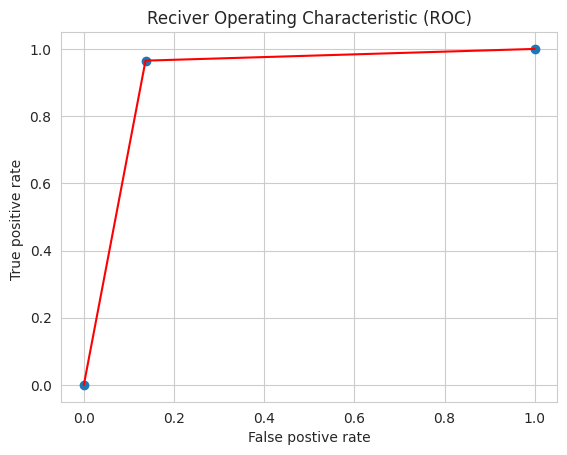

In [36]:
# to for the ROC and AUC curve
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,dummy = roc_curve(y, clean_data['predict_proba'])
import matplotlib.pyplot as plt
plt.scatter(fpr,tpr)
plt.plot(fpr,tpr,color = "r")
plt.xlabel("False postive rate")
plt.ylabel("True positive rate ")
plt.title("Reciver Operating Characteristic (ROC)")
plt.show()

In [37]:
# accuracy score value
auc_curve = roc_auc_score(y,clean_data['predict_proba'])
print('Area under curve :',np.round(auc_curve,3))

Area under curve : 0.914


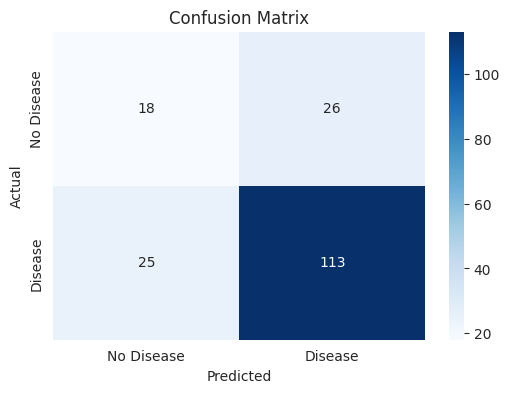

In [38]:
# heatmap of the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [39]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image

In [40]:
# cross validation  spkit the data set

training_acc = []
testing_acc =[]
for i in range(1,101):
    x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2,random_state = i)
    model = DecisionTreeClassifier(max_depth = 15)
    model.fit(x_train,y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    training_acc.append(accuracy_score(y_train,y_pred_train))
    testing_acc.append(accuracy_score(y_test,y_pred_test))
print("tarining accuracy :",np.round(np.mean(training_acc),2))
print("test accuracy :",np.round(np.mean(testing_acc),2))

tarining accuracy : 0.99
test accuracy : 0.71


In [41]:
# depth and count of the decision tree
print('max depth :',model.tree_.max_depth)   # depth of the decision tree
print('max count :',model.tree_.node_count)  # count of the nodes

max depth : 15
max count : 269


In [42]:
!pip install pydotplus

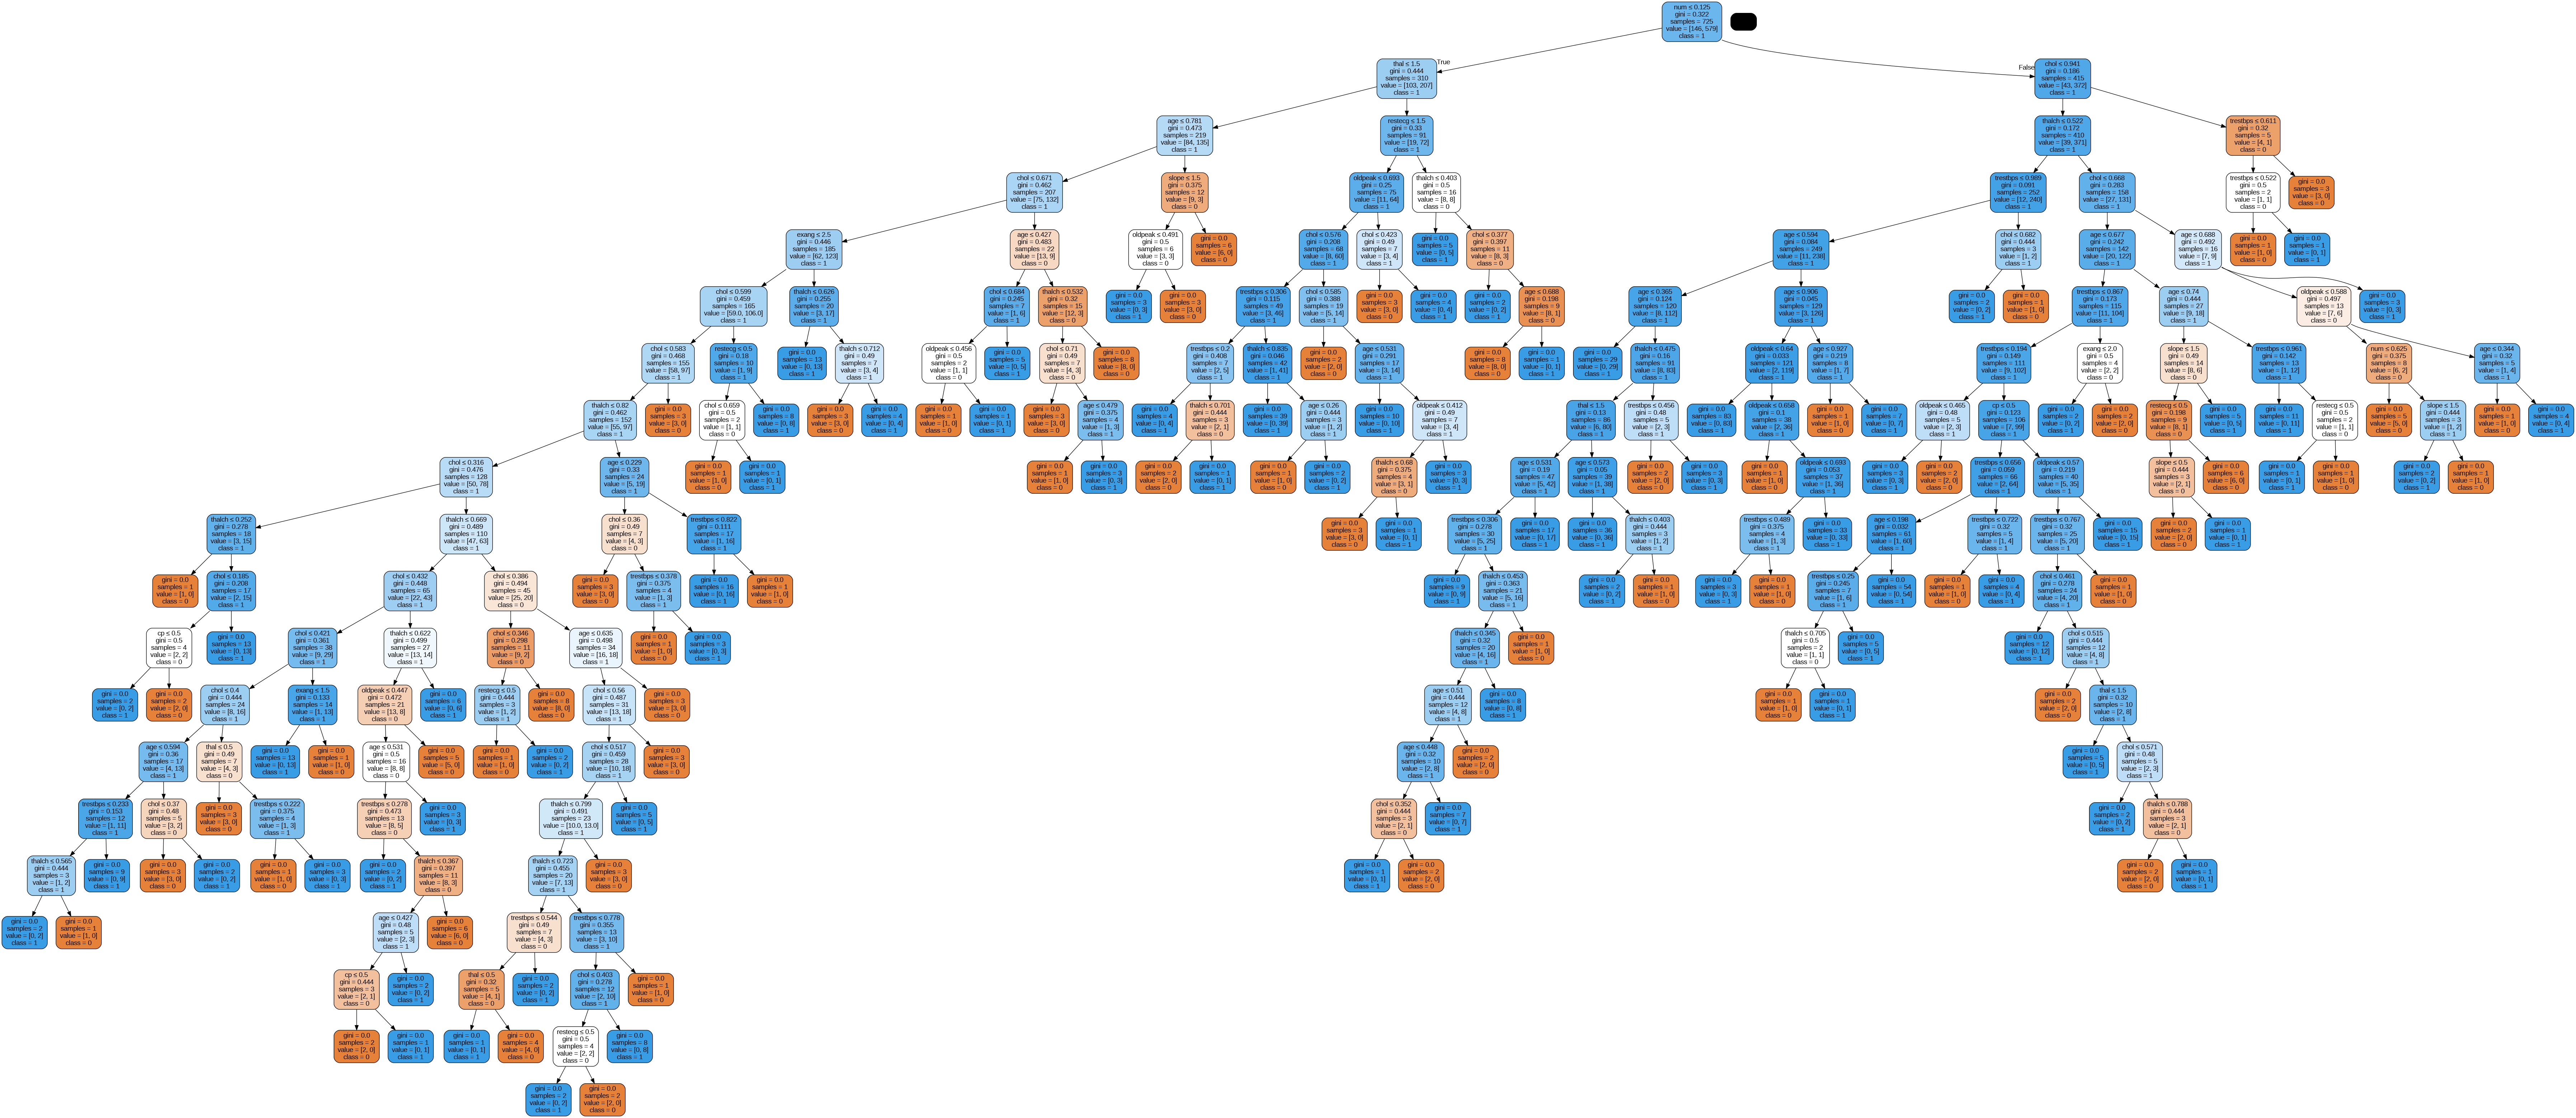

In [43]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus # Import pydotplus

# Visualizing the Decision Tree
dot_data = StringIO()
export_graphviz(model_dt, out_file=dot_data, filled=True, rounded=True, special_characters=True,
                feature_names=x.columns, class_names=['0', '1'])

# Convert to graph and display
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('sales_decision_tree.png')

# Display the decision tree image
Image(graph.create_png())


# **Interview Questions:**

In [44]:
# 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
'''
    Common decision tree hyperparameters like max_depth, min_samples_split, and min_samples_leaf control model complexity and prevent overfitting,
    impacting performance by influencing the tree's ability to generalize to unseen data.

max_depth
    Low max_depth: Results in a simpler model that might underfit the data, failing to capture complex relationships.
    High max_depth: Leads to a more complex model that can overfit the training data, performing poorly on unseen data.
main_sample_split
   Low min_samples_split: Allows for more splits, potentially leading to a complex and overfitting model.
   High min_samples_split: Restricts splitting, leading to a simpler model that might underfit.
min_weight_fraction_leaf
   Low min_weight_fraction_leaf: Allows for more leaf nodes, potentially leading to a complex and overfitting model.
   High min_weight_fraction_leaf: Restricts the formation of leaf nodes, leading to a simpler model that might underfit.
criterion
   gini (Gini impurity): Focuses on minimizing the impurity of the split, which can lead to a more balanced tree.
   entropy (Information gain): Focuses on maximizing the information gain of the split, which can lead to a more informative tree.
'''
#  2. What is the difference between the Label encoding and One-hot encoding?
'''
Label Encoding and One-Hot Encoding are two different techniques
used to convert categorical data into numerical form for machine learning models.
   Label encoding converts categorical data into numerical labels (integers), while one-hot encoding creates binary columns (0 or 1) for each category,
   representing each category as a separate feature.

LABREL ENCODING
    Label encoding assigns a unique integer to each category in a categorical variable.
    Simple and quick to implement.
    Uses less memory compared to one-hot encoding.
OHE HOT ENCODING
   One-hot encoding creates a new binary column for each category of a categorical feature.
  Prevents the model from assuming any ordinal relationship between the categories.
  Widely applicable to many types of machine learning algorithm
'''


'\nLabel Encoding and One-Hot Encoding are two different techniques\nused to convert categorical data into numerical form for machine learning models.\n   Label encoding converts categorical data into numerical labels (integers), while one-hot encoding creates binary columns (0 or 1) for each category,\n   representing each category as a separate feature.\n\nLABREL ENCODING\n    Label encoding assigns a unique integer to each category in a categorical variable.\n    Simple and quick to implement.\n    Uses less memory compared to one-hot encoding.\nOHE HOT ENCODING\n   One-hot encoding creates a new binary column for each category of a categorical feature.\n  Prevents the model from assuming any ordinal relationship between the categories.\n  Widely applicable to many types of machine learning algorithm\n'